<a href="https://colab.research.google.com/github/sm0bin/machine-learning-lab/blob/main/Appriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Mobin lets be good man.")

Mobin lets be good man.


In [ ]:
print("Don't lose hoop!");
print("Let's do good.");
print("You are a good person.");

You are a good person.


In [ ]:
transactions = [
        {1,2,5},
        {2,4},
        {2,3},
        {1,2,4},
        {1,3},
        {2,3},
        {1,3},
        {1,2,3,5},
        {1,2,3}
    ]
minSupport = 2


def generateCandidates(prevFrequentItemsets, k):
    candidates = set()

    for itemset1 in prevFrequentItemsets:
        for itemset2 in prevFrequentItemsets:
            if itemset1 != itemset2:
                candidate = itemset1.union(itemset2)
                if len(candidate) == k:
                    candidates.add(candidate)

    return candidates


def getFrequentOneItemsets(transactions, minSupport):
    itemCounts = {}

    for transaction in transactions:
        for item in transaction:
            itemCounts[item] = itemCounts.get(item, 0) + 1

    frequentOneItemsets = {frozenset([item]): count for item, count in itemCounts.items() if count >= minSupport}

    return frequentOneItemsets


frequentOneItemsets = getFrequentOneItemsets(transactions, minSupport)
print("Frequent 1-itemsets:", frequentOneItemsets)


def getFrequentKPlusOneItemsets(transactions, minSupport, k, frequentKItemsets):
    frequentKPlusOneItemsets = {}
    candidates = set()

    frequentKItemsetsList = list(frequentKItemsets.keys())
    candidates.update(generateCandidates(frequentKItemsetsList, k))

    while candidates:
        candidateCounts = {}

        for transaction in transactions:
            for candidate in candidates:
                if candidate.issubset(transaction):
                    candidateCounts[candidate] = candidateCounts.get(candidate, 0) + 1

        frequentKPlusOneItemsets.update(
            {candidate: count for candidate, count in candidateCounts.items() if count >= minSupport})

        candidates = generateCandidates(set(frequentKPlusOneItemsets.keys()), k + 1)
        k += 1

    return frequentKPlusOneItemsets

frequentTwoItemsets = getFrequentKPlusOneItemsets(transactions, minSupport, 2, frequentOneItemsets)
print("Frequent 2-itemsets:", frequentTwoItemsets)

frequentThreeItemsets = getFrequentKPlusOneItemsets(transactions, minSupport, 3, frequentTwoItemsets)
print("Frequent 3-itemsets:", frequentThreeItemsets)


Frequent 1-itemsets: {frozenset({1}): 6, frozenset({2}): 7, frozenset({5}): 2, frozenset({4}): 2, frozenset({3}): 6}
Frequent 2-itemsets: {frozenset({1, 2}): 4, frozenset({2, 5}): 2, frozenset({1, 5}): 2, frozenset({2, 4}): 2, frozenset({2, 3}): 4, frozenset({1, 3}): 4, frozenset({1, 2, 5}): 2, frozenset({1, 2, 3}): 2}
Frequent 3-itemsets: {frozenset({1, 2, 5}): 2, frozenset({1, 2, 3}): 2}


In [ ]:
import numpy as np

class Node:
    def __init__(self, attribute=None, label=None, branches=None):
        self.attribute = attribute    # Attribute used for splitting
        self.label = label            # Class label for leaf node
        self.branches = branches      # Dictionary of branches

def ID3(examples, target_attribute, attributes):
    # Create a root node for the tree
    root = Node()

    # If all examples are positive or negative, return a single-node tree
    if np.all(examples[:, target_attribute] == 1):
        root.label = '+'
        return root
    elif np.all(examples[:, target_attribute] == 0):
        root.label = '-'
        return root

    # If number of predicting attributes is empty, return the most common value
    # of the target attribute in the examples
    if len(attributes) == 0:
        root.label = np.argmax(np.bincount(examples[:, target_attribute]))
        return root

    # Find the attribute that best classifies examples
    best_attribute = choose_best_attribute(examples, target_attribute, attributes)

    # Set decision tree attribute for root
    root.attribute = best_attribute

    # For each possible value of the best attribute, create a subtree
    root.branches = {}
    unique_values = np.unique(examples[:, best_attribute])
    for value in unique_values:
        # Let Examples_i be the subset of examples that have the value for the best attribute
        examples_i = examples[examples[:, best_attribute] == value]

        # Recursively add subtree
        root.branches[value] = ID3(examples_i, target_attribute, [attr for attr in attributes if attr != best_attribute])

    return root

def choose_best_attribute(examples, target_attribute, attributes):
    # Calculate information gain for each attribute
    info_gains = [calculate_info_gain(examples, target_attribute, attr) for attr in attributes]

    # Choose attribute with maximum information gain
    best_index = np.argmax(info_gains)
    return attributes[best_index]

def calculate_info_gain(examples, target_attribute, attribute):
    # Calculate entropy before split
    entropy_before = calculate_entropy(examples[:, target_attribute])

    # Calculate entropy after split
    unique_values = np.unique(examples[:, attribute])
    weighted_entropy_after = 0
    for value in unique_values:
        examples_i = examples[examples[:, attribute] == value]
        weighted_entropy_after += (len(examples_i) / len(examples)) * calculate_entropy(examples_i[:, target_attribute])

    # Calculate information gain
    info_gain = entropy_before - weighted_entropy_after
    return info_gain

def calculate_entropy(data):
    # Calculate entropy of a binary variable
    p_positive = np.sum(data) / len(data)
    p_negative = 1 - p_positive
    if p_positive == 0 or p_negative == 0:
        return 0
    entropy = -p_positive * np.log2(p_positive) - p_negative * np.log2(p_negative)
    return entropy

# Sample dataset
# Format: Each row represents an example, the last column represents the target attribute
# 1st column: Outlook (0: Sunny, 1: Overcast, 2: Rainy)
# 2nd column: Temperature (0: Hot, 1: Mild, 2: Cool)
# 3rd column: Humidity (0: High, 1: Normal)
# 4th column: Windy (0: False, 1: True)
# 5th column: Play (0: No, 1: Yes)
data = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [2, 1, 0, 0, 1],
    [2, 2, 1, 0, 1],
    [2, 2, 1, 1, 0],
    [1, 2, 1, 1, 1]
])

# Define target attribute index and predicting attribute indices
target_attribute_index = 4
predicting_attribute_indices = [0, 1, 2, 3]

# Construct decision tree
tree = ID3(data, target_attribute_index, predicting_attribute_indices)

# Example usage: Traverse the tree to classify a new example
def classify_example(example, tree):
    if tree.label is not None:
        return tree.label
    else:
        attribute_value = example[tree.attribute]
        if attribute_value in tree.branches:
            subtree = tree.branches[attribute_value]
            return classify_example(example, subtree)
        else:
            # If attribute value is not in branches, return the most common label in the subtree
            labels = [classify_example(example, subtree) for subtree in tree.branches.values()]
            return max(labels, key=labels.count)

# Test classification
example = [0, 1, 0, 0]  # [Outlook: Sunny, Temperature: Mild, Humidity: High, Windy: False]
print("Classification:", classify_example(example, tree))


Classification: -


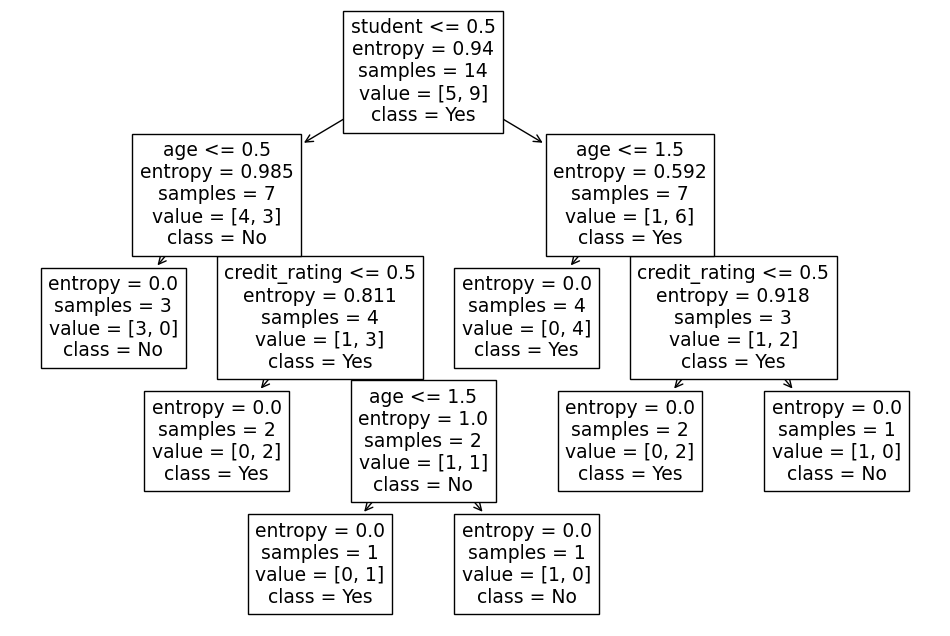

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Define the dataset
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': [False, False, False, False, True, True, True, False, True, True, True, False, True, False],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': [False, False, True, True, True, False, True, False, True, True, True, True, True, False]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical variables to numerical
df['age'] = df['age'].map({'<=30': 0, '31-40': 1, '>40': 2})
df['income'] = df['income'].map({'low': 0, 'medium': 1, 'high': 2})
df['credit_rating'] = df['credit_rating'].map({'fair': 0, 'excellent': 1})

# Create Decision Tree model
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# # Fit the model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=False, rounded=False)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Split features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Splitting the dataset into the training set and test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the value of k
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Support Vector Machine Classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Display accuracies
print("Accuracy of Decision Tree:", accuracy_dtree)
print("Accuracy of K-Nearest Neighbors:", accuracy_knn)
print("Accuracy of Support Vector Machine:", accuracy_svm)


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'